In [1]:
import pandas
import numpy
import os
import re
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import matplotlib.pyplot as plt

file_path = os.path.join('data','imdb')

In [2]:
content_based_df = pandas.read_csv(os.path.join(file_path,'content_based_with_wiki.csv'))

In [3]:
content_based_df

titleId  ordering                    title region  cluster  \
0      tt0000001         6               Carmencita     US        0   
1      tt0000002         7   The Clown and His Dogs     US        0   
2      tt0000003         7             Poor Pierrot     GB        0   
3      tt0000005        11   The Blacksmith's Forge     GB        3   
4      tt0000006         3        Chinese Opium Den     US        4   
...          ...       ...                      ...    ...      ...   
14302  tt0016999         1                    Irene     US        4   
14303  tt0017000         1           The Iron Rider     US        4   
14304  tt0017001         3  The Isle of Retribution     US        2   
14305  tt0017002         3          It Must Be Love     US        2   
14306  tt0017003         1            It's the Gate     US        4   

       averageRating  numVotes                    genres  \
0           5.600000    1647.0         Documentary,Short   
1           6.100000     198.0           Animation,Short   
2           6.500000    1350.0  Animation,Comedy,Romance   
3           6.200000    2137.0              Comedy,Short   
4           5.300000     115.0                     Short   
...              ...       ...                       ...   
14302       7.100000      62.0            Comedy,Romance   
14303       6.400000      11.0                   Western   
14304       1.700000      11.0    Action,Adventure,Drama   
14305       5.821766     373.0                    Comedy   
14306       6.400000      24.0    Animation,Comedy,Short   

                                                    cast  \
0                                             Carmencita   
1                                          Gaston Paulin   
2      Émile Reynaud,Gaston Paulin,Julien Pappé,Tamar...   
3                                Charles Kayser,John Ott   
4                                                    NaN   
...                                                  ...   
14302  George K. Arthur,Marion Aye,Ida Darling,Edward...   
14303                   Elsa Benham,Francis Milligan,Boy   
14304  James P. Hogan,Jules Cronjager,Glen Gano,Frank...   
14305  Brooke Hanlon,Cleve Moore,Mary O'Brien,Dorothy...   
14306                       J. Deutsch and His Orchestra   

                                           data_combined  
0      Carmencita Documentary Short Carmencita US.  T...  
1      The Clown and His Dogs Animation Short Gaston ...  
2      Poor Pierrot Animation Comedy Romance Émile Re...  
3      The Blacksmith s Forge Comedy Short Charles Ka...  
4      Chinese Opium Den Short   US.  My Lady's Slipp...  
...                                                  ...  
14302  Irene Comedy Romance George K Arthur Marion Ay...  
14303  The Iron Rider Western Elsa Benham Francis Mil...  
14304  The Isle of Retribution Action Adventure Drama...  
14305  It Must Be Love Comedy Brooke Hanlon Cleve Moo...  
14306  It s the Gate Animation Comedy Short J Deutsch...  

[14307 rows x 10 columns]

In [4]:
tfidf_cosine_sim = numpy.load('tfidf_cosine_similarity_with_wikipedia.npy')

In [5]:
bert_cosine_sim = numpy.load('bert_cosine_similarity_with_wikipedia.npy')

In [6]:
mapping = pandas.Series(content_based_df.index,index = content_based_df['title'])

In [7]:
mapping

title
Carmencita                     0
The Clown and His Dogs         1
Poor Pierrot                   2
The Blacksmith's Forge         3
Chinese Opium Den              4
                           ...  
Irene                      14302
The Iron Rider             14303
The Isle of Retribution    14304
It Must Be Love            14305
It's the Gate              14306
Length: 14307, dtype: int64

In [8]:
def recommend_movies_based_on_data(movie_list=[], similarity_matrix = tfidf_cosine_sim ,to_recommend = 5):
    """ 
    Takes input as a list of movies and finds the most similar movies based on cosine similarity matrix.
    movie_list is an array where any number of movies can be specified
    similarity_matrix found using TFIDF or BERT
    to_recommend is the number of movies to recommend as the output
    """
    movie_score =[]
    for movie_input in movie_list:
        
        movie_index = mapping[movie_input]

        
        if(type(movie_index) == pandas.core.series.Series):
            movie_index = movie_index[0]

        similarity_score = list(enumerate(similarity_matrix[movie_index]))

        similarity_score = sorted(similarity_score, key=lambda x: x[1], reverse=True)

        movie_score.extend(similarity_score[1:to_recommend+1])
        
    movie_score = sorted(movie_score, key=lambda x: x[1], reverse=True)

    movie_score = numpy.array(movie_score)
    
    movie_indices = [i for i in numpy.unique(movie_score[:,0])]

    movie_indices = movie_indices[:to_recommend]

    return (content_based_df['title'].iloc[movie_indices])

In [9]:
recommend_movies_based_on_data(["Uncle Josh in a Spooky Hotel"],similarity_matrix = tfidf_cosine_sim)

3210        A Girl of the People
3455          The Man of Destiny
7638     Flying with the Marines
8293              Within the Cup
11328     The Mohican's Daughter
Name: title, dtype: object

In [10]:
recommend_movies_based_on_data(["Treasure Island"],similarity_matrix = bert_cosine_sim)

1623     The Girl and Her Trust
6990             The Mortal Sin
8732                The Janitor
9701               Moon Madness
12088     Other Men's Daughters
Name: title, dtype: object

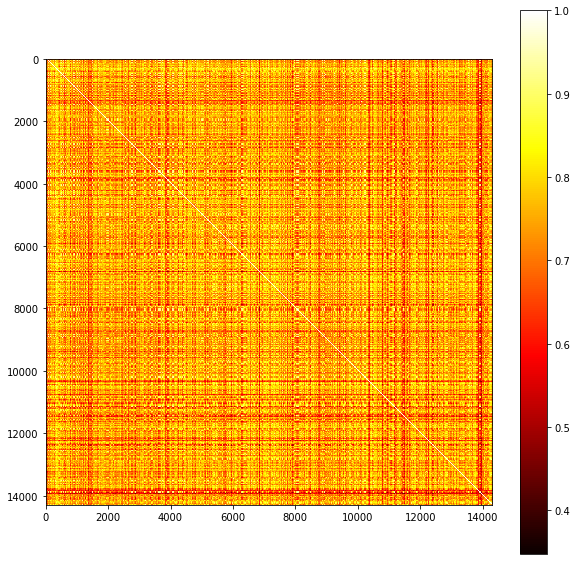

In [11]:
fig = plt.figure(0,(10,10))
plt.imshow(bert_cosine_sim,cmap='hot',interpolation="nearest")
plt.colorbar()

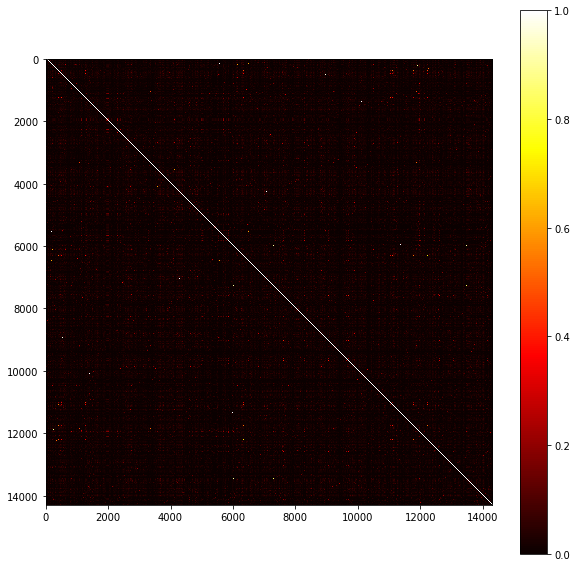

In [12]:
fig = plt.figure(0,(10,10))
plt.imshow(tfidf_cosine_sim, cmap='hot', interpolation='nearest')
plt.colorbar()